# Regression Challenge

Predicting the selling price of a residential property depends on a number of factors, including the property age, availability of local amenities, and location.

In this challenge, you will use a dataset of real estate sales transactions to predict the price-per-unit of a property based on its features. The price-per-unit in this data is based on a unit measurement of 3.3 square meters.

> **Citation**: The data used in this exercise originates from the following study:
>
> *Yeh, I. C., & Hsu, T. K. (2018). Building real estate valuation models with comparative approach through case-based reasoning. Applied Soft Computing, 65, 260-271.*
>
> It was obtained from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science).

## Review the data

Run the following cell to load the data and view the first few rows.

In [67]:
import numpy as np
#plotting library
import matplotlib.pyplot as plt
import seaborn as sns
#This ensures plots are displayed inline in the Jupyter notebook
%matplotlib inline
#sklearn
from sklearn.model_selection import train_test_split
#preprocess
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
#linear models
from sklearn.linear_model import LinearRegression,Ridge,Lasso

#Tree models
from sklearn.tree import DecisionTreeRegressor

#Ensemble methods
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
#stats
import statsmodels.api as sm

#metrics
from sklearn.metrics import mean_squared_error, r2_score,explained_variance_score


In [38]:
from sklearn import linear_model

In [39]:
print(linear_model.)

<module 'sklearn.linear_model' from '/anaconda/envs/azureml_py36/lib/python3.6/site-packages/sklearn/linear_model/__init__.py'>


In [3]:
import pandas as pd

# load the training dataset
data = pd.read_csv('data/real_estate.csv')
data.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


The data consists of the following variables:

- **transaction_date** - the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- **house_age** - the house age (in years)
- **transit_distance** - the distance to the nearest light rail station (in meters)
- **local_convenience_stores** - the number of convenience stores within walking distance
- **latitude** - the geographic coordinate, latitude
- **longitude** - the geographic coordinate, longitude
- **price_per_unit** house price of unit area (3.3 square meters)

## Train a Regression Model

Your challenge is to explore and prepare the data, identify predictive features that will help predict the **price_per_unit** label, and train a regression model that achieves the lowest Root Mean Square Error (RMSE) you can achieve (which must be less than **7**) when evaluated against a test subset of data.

Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [02 - Real Estate Regression Solution.ipynb](02%20-%20Real%20Estate%20Regression%20Solution.ipynb).

In [4]:
data.shape

(414, 7)

In [5]:
data.describe()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
transaction_date            414 non-null float64
house_age                   414 non-null float64
transit_distance            414 non-null float64
local_convenience_stores    414 non-null int64
latitude                    414 non-null float64
longitude                   414 non-null float64
price_per_unit              414 non-null float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


## Checking for datatypes of Variables

In [7]:
data.select_dtypes(include=['float']).columns.tolist()

['transaction_date',
 'house_age',
 'transit_distance',
 'latitude',
 'longitude',
 'price_per_unit']

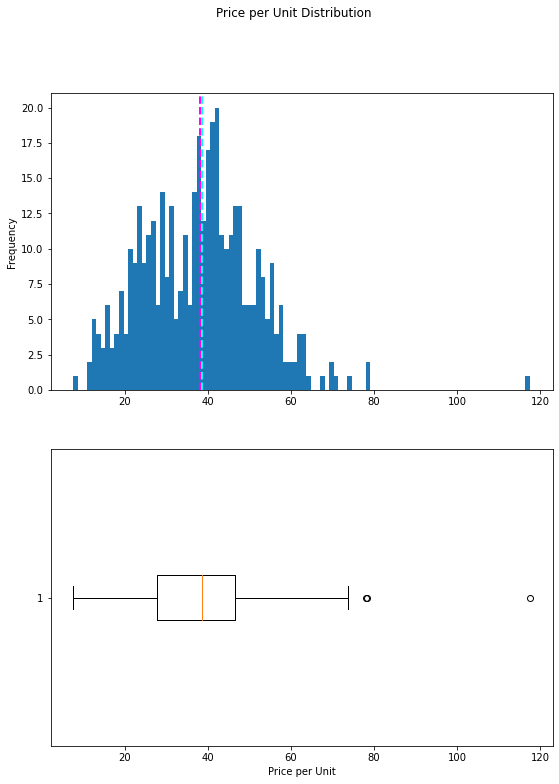

In [8]:
# Get the label column
label = data['price_per_unit']


# Create a figure for 2 subplots (2 rows, 1 column)
fig, ax = plt.subplots(2, 1, figsize = (9,12))

# Plot the histogram   
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')

# Add lines for the mean, median, and mode
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

# Plot the boxplot   
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Price per Unit')

# Add a title to the Figure
fig.suptitle('Price per Unit Distribution')

# Show the figure
fig.show()

The above histogram plot shows that price per unit follows a normal distribution. Looking at both plots we can also see 2 outlier identified at 80 and around 120 value.

# Remove Outliers

## Standard Deviation method

In [9]:
data_mean, data_std = data['price_per_unit'].mean(), data['price_per_unit'].std()
# identify outliers
standard_deviation_3 = data_std * 3
lower, upper = data_mean - standard_deviation_3, data_mean + standard_deviation_3
print(standard_deviation_3,lower, upper)

40.81946309320594 -2.839269856490958 78.79965632992092


here we used 3 standard deviations and mean to obtain the range for identifying the outliers.

In [10]:
data[(data['price_per_unit']<lower) | (data['price_per_unit']>upper)]

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
270,2013.333,10.8,252.5822,1,24.9746,121.53046,117.5


## Interquantile range

In [11]:
# calculate interquartile range
q25, q75 = np.percentile(data['price_per_unit'], 25), np.percentile(data['price_per_unit'], 75)
iqr = q75 - q25
q25-iqr*1.5,q75+iqr*1.5

(-0.6500000000000021, 74.95)

In [12]:
data[data['price_per_unit']>74.9]

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
220,2013.333,37.2,186.5101,9,24.97703,121.54265,78.3
270,2013.333,10.8,252.5822,1,24.97460,121.53046,117.5
312,2013.583,35.4,318.5292,9,24.97071,121.54069,78.0


In [13]:
data['price_per_unit'][(data['price_per_unit']<-0.65) | (data['price_per_unit']>74.95)].count()

3

## Z-score

In [14]:
threshold = 3
outlier = []
for i in data['price_per_unit']:
    z = (i-data_mean)/data_std
    if z > threshold:
        outlier.append(i)
print('outlier in dataset is', outlier)

outlier in dataset is [117.5]


As two methods suggested only one value as an outlier and also by seeing the distribution data.we are going to remove 
only 117.5 as an outlier

In [15]:
data=data[(data['price_per_unit']>lower) & (data['price_per_unit']<upper)]

In [16]:
data.shape

(413, 7)

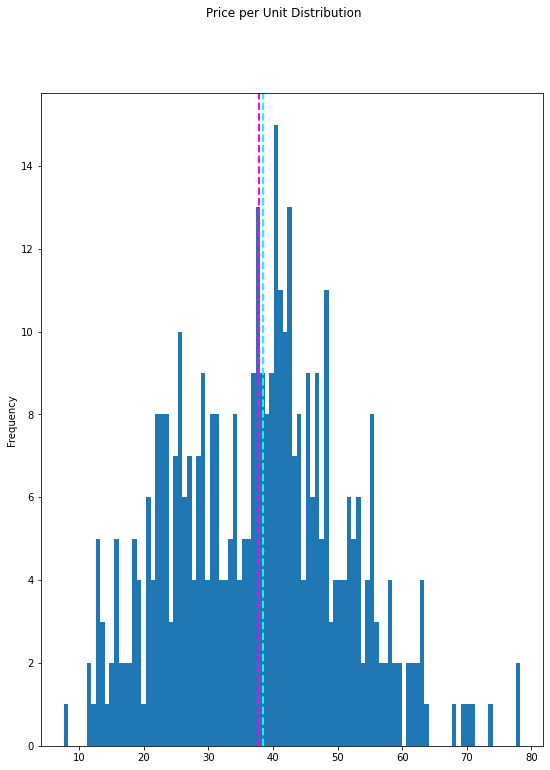

In [17]:
# Get the label column
label = data['price_per_unit']


# Create a figure for 2 subplots (2 rows, 1 column)
fig, ax = plt.subplots(figsize = (9,12))

# Plot the histogram   
ax.hist(label, bins=100)
ax.set_ylabel('Frequency')

# Add lines for the mean, median, and mode
ax.axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)
# Add a title to the Figure
fig.suptitle('Price per Unit Distribution')

# Show the figure
fig.show()

In [18]:
data.columns

Index(['transaction_date', 'house_age', 'transit_distance',
       'local_convenience_stores', 'latitude', 'longitude', 'price_per_unit'],
      dtype='object')

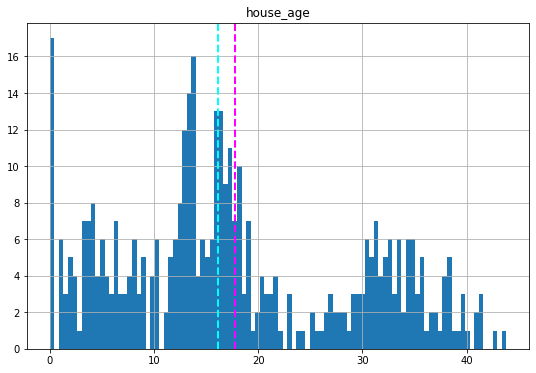

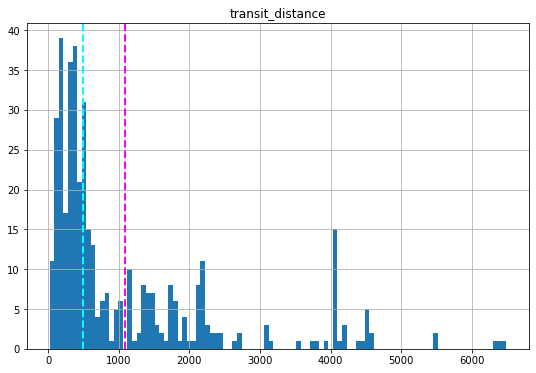

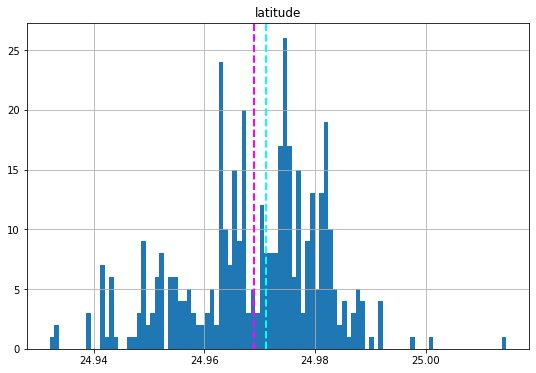

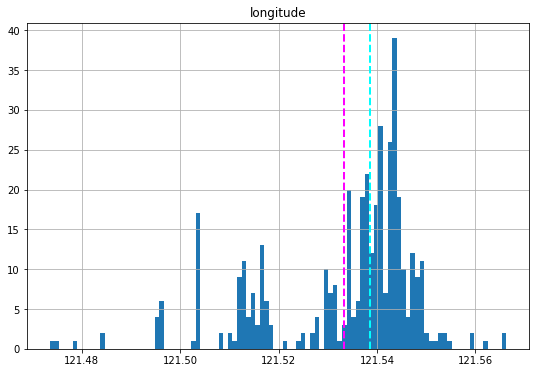

In [19]:
#looking at the plots of numerical variables

numeric_features=data[['house_age', 'transit_distance', 'latitude', 'longitude']]
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = data[col]
    feature.hist(bins=100, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

looking at the above figures we can say that they are not following a normal distrbution curves.

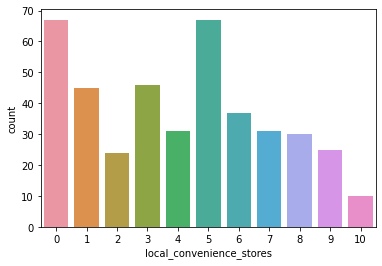

In [20]:
sns.countplot(x ='local_convenience_stores', data=data)

[Text(0, 0, '2012.6670000000001'),
 Text(0, 0, '2012.75'),
 Text(0, 0, '2012.8329999999999'),
 Text(0, 0, '2012.9170000000001'),
 Text(0, 0, '2013.0'),
 Text(0, 0, '2013.0829999999999'),
 Text(0, 0, '2013.1670000000001'),
 Text(0, 0, '2013.25'),
 Text(0, 0, '2013.3329999999999'),
 Text(0, 0, '2013.4170000000001'),
 Text(0, 0, '2013.5'),
 Text(0, 0, '2013.5829999999999')]

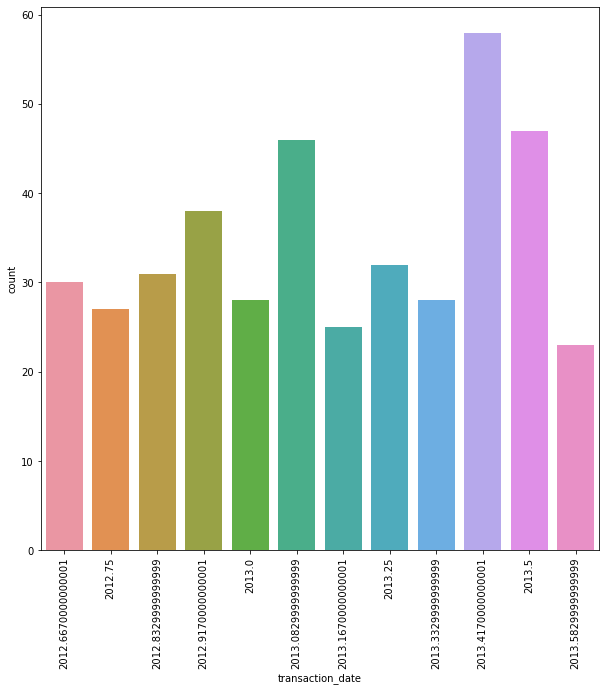

In [21]:
plt.figure(figsize=(10,10))
sns_plot=sns.countplot(x ='transaction_date', data=data)
sns_plot.set_xticklabels(sns_plot.get_xticklabels(), rotation=90)

<Figure size 648x432 with 0 Axes>

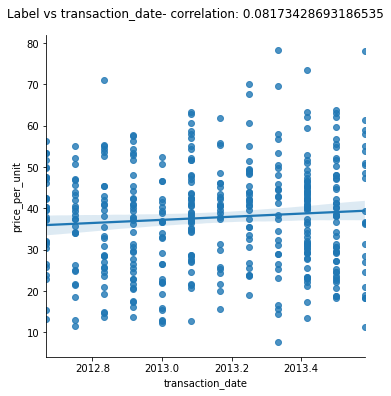

<Figure size 648x432 with 0 Axes>

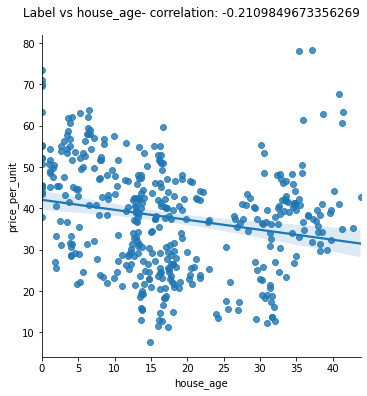

<Figure size 648x432 with 0 Axes>

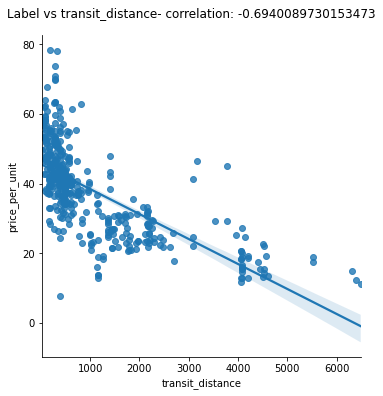

<Figure size 648x432 with 0 Axes>

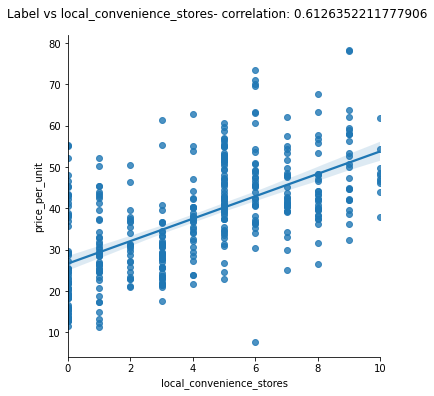

<Figure size 648x432 with 0 Axes>

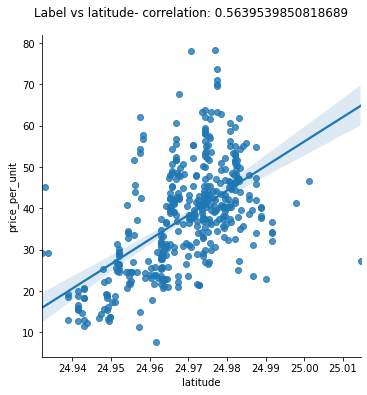

<Figure size 648x432 with 0 Axes>

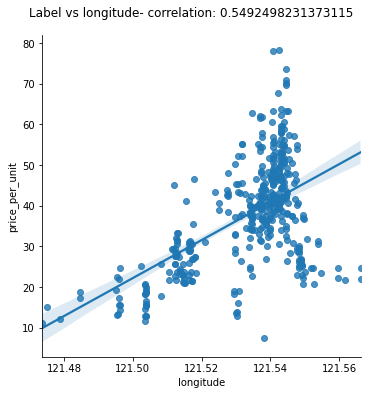

In [22]:

for column in data[data.columns[0:-1]]:
    fig= plt.figure(figsize=(9, 6))
    
    feature = data[column]
    label=data['price_per_unit']
    
    correlation = feature.corr(label)
    
    lm=sns.lmplot(data=data,y='price_per_unit',x=column)
    fig2 = lm.fig 

    ax.set(xlabel=column,ylabel='Correlations')
    #ax.text(s='Label vs ' + column + '- correlation: ' + str(correlation),fontsize=16, weight='bold', ha='center')
    fig2.suptitle('Label vs ' + column + '- correlation: ' + str(correlation),fontsize=12,y=1.05)
plt.show()

Looking at the correlation values, we can see increasing relationships of label with logitute,latitude,stores and downward relationship of label with  transit distance and house age. However with transaction date there is no much relationship between values,so may be can exclude it. Although thorugh correlation we can see the relationship between two variables but it does not necessarily mean that one variable will cause the other variable to occur or not occur. so we need to check statistics measures before we exclude any feature.

## OLS 

- It is known as Ordinary least sqaures method of linear regression.
- it is a statistical model which helps us in identifying the significant features in the data that drives the target   variable.

In [23]:
#adding constant term helps to reduce the bias
result=sm.OLS(data['price_per_unit'],sm.add_constant(data[data.columns[0:-1]])).fit()
result.summary()

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         price_per_unit   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     113.6
Date:                Sat, 19 Jun 2021   Prob (F-statistic):           1.08e-83
Time:                        15:29:31   Log-Likelihood:                -1442.8
No. Observations:                 413   AIC:                             2900.
Df Residuals:                     406   BIC:                             2928.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -1.673e+04   6146.677     -2.722      0.007   -2.88e+04   -4649.947
transaction_date             4.6039      1.413      3.259      0.001       1.827       7.381
house_age                   -0.2612      0.035     -7.476      0.000      -0.330      -0.193
transit_distance            -0.0039      0.001     -5.974      0.000      -0.005      -0.003
local_convenience_stores     1.2866      0.171      7.510      0.000       0.950       1.623
latitude                   223.1249     40.399      5.523      0.000     143.708     302.542
longitude                   15.9222     44.140      0.361      0.718     -70.849     102.693
==============================================================================
Omnibus:                       64.223   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.612
Skew:                           0.759   Prob(JB):                     6.62e-37
Kurtosis:                       5.716   Cond. No.                     3.72e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.72e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- **R-Square**- it is a statistical measure to know how close the data are to the fitted regression line.This tells us the percentage of variation in response variable explained by independent variables.One drawback with R-square is,it always increases with addition of new independent variables whether they are important or not
- **Adj.R-squared**- It is better adjustment in the r-square formula.This tells us 62%  of price_per_unit cane be explained by our independent variables.
- **F-statistic**- 
- **t-value**- Higher the magnitude of t-value, more significant the feature is to target variable.From above, only logitude variable has the lowest magnitude for t-value.
- **P-value**- The p-value plays an important role in selecting the significant features.If p-value is less than 0.05 for a feature,then we can consdier that feature to be significant.Here all features have p-value less than 0.05 except longitude.So it's not statistically significant.
- **Coeff**-  Coefficent value indicates the mean change in the dependent variable for a given one-unit change in the independent variable. The sign of the coefficent value tells whether it is a positive or negative relationship.eg:-For every one unit change in transaction date there is increase of 4.6 in price per unit.
- **Cond.No.**- This is known as condition number, which measures the sensitivity of a function's output as compared to its input.
- **Omnibus**- This is used to test the siginificance of several model parameters at once and it is represents the normalcy in the distribution. A 0 value will indicate perfect normalcy.
- **Durbin-Watson**- it is the measure of homoscedasticity(having same scatter or even distrbution),to detect the presence of autocorrelation in residuals.it ranges from 0 to 4. 2 means no autocorrelation, 0to<2 positive autocorrelation (common in time series data) and 2to4 negative correlation. Our test results shows that we have negative autocorrelation.


In [24]:
#Splitting the dataset into dependent and independent variables
X,y=data[data.columns[0:-2]].values, data[data.columns[-1]].values


#Splitting the dataset into train and test using sklearn model selection library

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

print('Training Set data:%d rows\nTest set data:%d rows' %(X_train.shape[0],X_test.shape[0]))


Training Set data:289 rows
Test set data:124 rows


In [25]:
X_train.shape

(289, 5)

- **X_train**: The features values to be used for training the model
- **y_train**: The corresponding labels for the training data
- **X_test**: The feature labels to be used for testing the model
- **y_test**: The corresponding labels for testing data to compare metrics for the predicted values from the model

## Preprocessing


- **Encoding of Categorical Features**- Here we convert the non-numeric features into numeric features.
1) **Label Encoding**: Here we provide categorical a numerical value using LabelEncoder library.The major drawback with this the priority levels it assigns to values.
2) **One hot Encoding**: This tecniques creates a new column for each categorical value, gives value 1 if that corresponding category is present at that location else 0. So this technqiues 0 and 1 to all the categirical values column. hence prevents priority levels. There are two ways to use this, one is using df.get_dummies  method and other one is using OneHotEncoder library.
- **Normalization**: Normalizing the numeric features so that they are on the same scale, this prevents features with large values producing inappropriate coeffiecients. There are various method to normalize data like **StandardScaler**,**Normalizer** etc.

## Preprocessing Pipeline

In [26]:
#preprocessing the numerical features

numeric_features=[1,2,4]
numeric_transformer=Pipeline(steps=[('scaler',StandardScaler())])

#Combining preprocessing steps

preprocessor=ColumnTransformer(transformers=[('num',numeric_transformer,numeric_features)])


## What is Regression Analysis?
- It is a modelling technique to analyze the relationship between dependent variables or labels and independent variables in a dataset.
- This technique helps us to predict trends, time series analysis,cause and effect relationship

## Regression methods available in Machine learning:-

- **Linear Regression**:It is the most basic type of regression where we have linear relationship between dependent and independent variables. Here,the independent variables can be correlated to each other.In case we have more than independent variables(like in this data), it is called mutliple linear regression.

- **Logistic Regression**: This method is used to measure relationship between dependent and independent variables when dependent variable is discrete i.e. 0 or 1. To use this method, first we need to check  first that data should be large and there is almost equal occurence of values in dependent variable,secondly independent variable should not be correlated to each other.

- **Ridge Regression**: This is also called L2 Regularlization and it is mostly used when there is a high correlation among  independent variables (also called mutli collinearity) which resuted in overfitting of model.it is a powerful regression method which is less susceptible t overfitting.Here we have added the lambda parameter in the equation which penalizes all the parameters except the intercept so that model generalizes the data but won't overfit.Ridge regularlization forces the weights to be small but not zero so it doesn't sparse solution. There is one drawback with ridge that is not robust to outliers. 

- **lasso Regression**: it stands for least absolute shrinkage and selection operator and also called L1(L1=lasso) regularlization.So this method uses absolute value of magnitude as penalty term to the loss function and it is also can be used for feature selection as coeficient value gets 0 for the less important features. So this method also helps in tackling the overfitting problem.

- **Polynomial Regression**:This method is same as mutli linear regression with a little modification.Here the relationship between dependent and independent variable is denoted by nth-degree. The line fitting the data points is not straight line, but a curved line.Here we try to minimize the mean squared error while fitting the line, so we need to careful of overfitting the model.

- **Bayesian Linear Regression**: This regression is based on bayes theorem to find out the regression coefficients.This method is combination linear and ridge regression but more stable.

## Linear Regression

In [27]:
#Creating training pipeline
pipeline=Pipeline(steps=[('preprocessor',preprocessor),
                        ('regressor',LinearRegression())])

#fitting the pipeline
model=pipeline.fit(X_train,y_train)
print(model)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  [1, 2, 4])],
                                   verbose=False)),
                ('regressor',
                 LinearRegression(copy_X=Tru

In [28]:
#predictions
predictions=model.predict(X_test)

## Metrics

Most common metrics used for evaluating regression analysis are:-
- **Mean Sqaured Error**- it is a popular metric for regression. MSE is the average of the squared difference between predicted and actual target values.
- **Root Mean Squared Error**- it is an extension of the mean squared error which is calculated by taking square root of MSE.
- **Mean Absolute Error**-  The MAE score is calculated as the average of the absolute error between predicted and actual target values.
- **R2 Score**-  It measures the strength of relationsip between your model and dependent variable on a scale of 0-100%.
- **Explained Variance Score**- This metric is used to calculate ratio between variance of error(true value and predicted values) and variance of true values.This value ranges from 0 to 1,higher the value better the model


In [30]:
mse=mean_squared_error(y_test,predictions)
print('MSE :',mse)

rmse=np.sqrt(mse)
print('RMSE :',rmse)

r2=r2_score(y_test,predictions)
print('R2 Square :',r2)

variance_score=explained_variance_score(y_test,predictions)
print('Explained variance score :',variance_score)

MSE : 79.58947646645481
RMSE : 8.921293430128548
R2 Square : 0.5266371547780784
Explained variance score : 0.5276010933311295


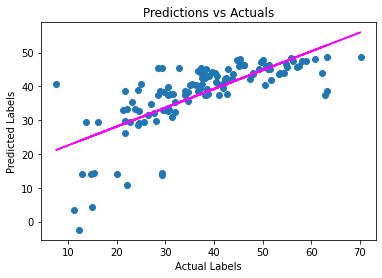

In [31]:
#plotting the results
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predictions vs Actuals')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

looking at the metrics score and above plot, we need to work model to improve the score.

## Ridge Regression

In [35]:
pipeline=Pipeline(steps=[('preprocessor',preprocessor),
                        ('regressor',Ridge())])

#fitting the pipeline
model=pipeline.fit(X_train,y_train)
print(model)
#predictions
predictions=model.predict(X_test)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  [1, 2, 4])],
                                   verbose=False)),
                ('regressor',
                 Ridge(alpha=1.0, copy_X=Tru

In [37]:
mse=mean_squared_error(y_test,predictions)
print('MSE :',mse)

rmse=np.sqrt(mse)
print('RMSE :',rmse)

r2=r2_score(y_test,predictions)
print('R2 Square :',r2)

variance_score=explained_variance_score(y_test,predictions)
print('Explained variance score :',variance_score)

MSE : 79.55429485281903
RMSE : 8.919321434549774
R2 Square : 0.5268463993851484
Explained variance score : 0.5278000869413567


We can see there is still no improvement in scores.

## Lasso Regression

In [40]:
pipeline=Pipeline(steps=[('preprocessor',preprocessor),
                        ('regressor',Lasso())])

#fitting the pipeline
model=pipeline.fit(X_train,y_train)
print(model)
#predictions
predictions=model.predict(X_test)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  [1, 2, 4])],
                                   verbose=False)),
                ('regressor',
                 Lasso(alpha=1.0, copy_X=Tru

In [41]:
mse=mean_squared_error(y_test,predictions)
print('MSE :',mse)

rmse=np.sqrt(mse)
print('RMSE :',rmse)

r2=r2_score(y_test,predictions)
print('R2 Square :',r2)

variance_score=explained_variance_score(y_test,predictions)
print('Explained variance score :',variance_score)

MSE : 82.12384228410532
RMSE : 9.062220604471364
R2 Square : 0.5115638728878291
Explained variance score : 0.5130206906779065


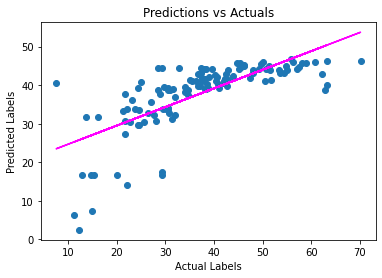

In [42]:
#plotting the results
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predictions vs Actuals')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

Regression Algorithms other than linear models:-

- **Tree based Regression models**- Algorithms that build decision tree to reach a prediction
- **Ensemble Algorithms**- This algorithm combines several base models to produce one optimal predictive model

## Tree  Based Regression

## Decision Tree Regressor

- The decision tree is also a type of supervised machine learning algorithm which can be used in classification as well as regression problems.It fits a sine curve with additional noisy observation.it learns local linear regression by approximating the sine curve.

In [54]:
pipeline=Pipeline(steps=[('preprocessor',preprocessor),
                        ('regressor',DecisionTreeRegressor(max_depth=2))])

#fitting the pipeline
model=pipeline.fit(X_train,y_train)
print(model)
#predictions
predictions=model.predict(X_test)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  [1, 2, 4])],
                                   verbose=False)),
                ('regressor',
                 DecisionTreeRegressor(ccp_a

In [55]:
mse=mean_squared_error(y_test,predictions)
print('MSE :',mse)

rmse=np.sqrt(mse)
print('RMSE :',rmse)

r2=r2_score(y_test,predictions)
print('R2 Square :',r2)

variance_score=explained_variance_score(y_test,predictions)
print('Explained variance score :',variance_score)

MSE : 69.4996522931235
RMSE : 8.336645146167822
R2 Square : 0.5866469461540786
Explained variance score : 0.5948143044773512


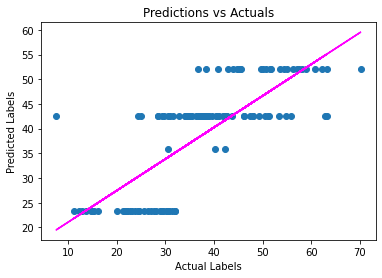

In [62]:
#plotting the results
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predictions vs Actuals')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

## KNeighbours Regressor
- It approximates the relation between independent variable and target by averaging the observations in the same neighbourhood
- The target is predicted by local interpolation of the targets associated of the nearest neighbrs.

In [64]:
pipeline=Pipeline(steps=[('preprocessor',preprocessor),
                        ('regressor',KNeighborsRegressor())])

#fitting the pipeline
model=pipeline.fit(X_train,y_train)
print(model)
#predictions
predictions=model.predict(X_test)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  [1, 2, 4])],
                                   verbose=False)),
                ('regressor',
                 KNeighborsRegressor(algorit

In [65]:
mse=mean_squared_error(y_test,predictions)
print('MSE :',mse)

rmse=np.sqrt(mse)
print('RMSE :',rmse)

r2=r2_score(y_test,predictions)
print('R2 Square :',r2)

variance_score=explained_variance_score(y_test,predictions)
print('Explained variance score :',variance_score)

MSE : 60.83292258064517
RMSE : 7.799546306077371
R2 Square : 0.6381928039434213
Explained variance score : 0.6474906567752399


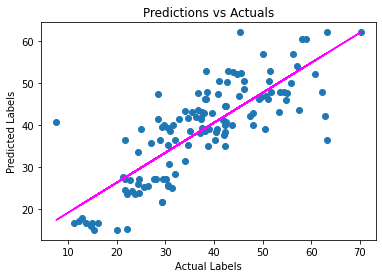

In [66]:
#plotting the results
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predictions vs Actuals')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

## Ensemble Learning Regression

## Random Forest Regressor

- It is made up of mutliple decision tree. Random forest randomly select a set of data points and features to decide the best split at each node of decision trees.
- The final prediction is done by averaging the predictions from all decision trees.

In [68]:
pipeline=Pipeline(steps=[('preprocessor',preprocessor),
                        ('regressor',RandomForestRegressor())])

#fitting the pipeline
model=pipeline.fit(X_train,y_train)
print(model)
#predictions
predictions=model.predict(X_test)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  [1, 2, 4])],
                                   verbose=False)),
                ('regressor',
                 RandomForestRegressor(boots

In [74]:
random_model=model

In [69]:
mse=mean_squared_error(y_test,predictions)
print('MSE :',mse)

rmse=np.sqrt(mse)
print('RMSE :',rmse)

r2=r2_score(y_test,predictions)
print('R2 Square :',r2)

variance_score=explained_variance_score(y_test,predictions)
print('Explained variance score :',variance_score)

MSE : 48.04672923776102
RMSE : 6.9315748021471295
R2 Square : 0.7142394011703326
Explained variance score : 0.7319521898571147


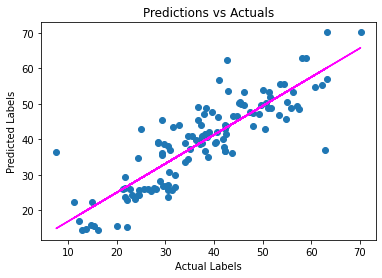

In [70]:
#plotting the results
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predictions vs Actuals')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

## Gradient Boosting Regressor

- it is a type bootsing algorithm  which creates a collection of predictors.Here we fit the model ann at every step analyze the data for error.So if model misinterprets an input,its weight is increased,such that in the next turn it will interpret correctly.At the end we combine all the weak learners into a better performing model.
- it builds an additive model which allows the optimization of loss function.

In [82]:
pipeline=Pipeline(steps=[('preprocessor',preprocessor),
                        ('regressor',GradientBoostingRegressor())])

#fitting the pipeline
model=pipeline.fit(X_train,y_train)
print(model)
#predictions
predictions=model.predict(X_test)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  [1, 2, 4])],
                                   verbose=False)),
                ('regressor',
                 GradientBoostingRegressor(a

In [72]:
mse=mean_squared_error(y_test,predictions)
print('MSE :',mse)

rmse=np.sqrt(mse)
print('RMSE :',rmse)

r2=r2_score(y_test,predictions)
print('R2 Square :',r2)

variance_score=explained_variance_score(y_test,predictions)
print('Explained variance score :',variance_score)

MSE : 52.289393580261454
RMSE : 7.231140544911394
R2 Square : 0.6890059186340571
Explained variance score : 0.7071982482014898


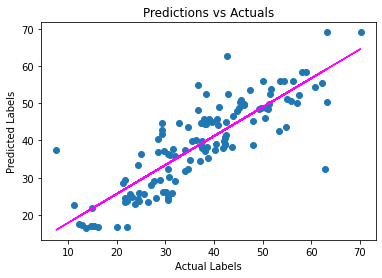

In [73]:
#plotting the results
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predictions vs Actuals')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

## Use the Trained Model

Save your trained model, and then use it to predict the price-per-unit for the following real estate transactions:

| transaction_date | house_age | transit_distance | local_convenience_stores | latitude | longitude |
| ---------------- | --------- | ---------------- | ------------------------ | -------- | --------- |
|2013.167|16.2|289.3248|5|24.98203|121.54348|
|2013.000|13.6|4082.015|0|24.94155|121.50381|

In [78]:
import joblib

filename='random.pkl'
joblib.dump(random_model,filename)

['random.pkl']

In [87]:
# Your code to use the trained model
loaded_model = joblib.load(filename)

X_new=np.array([[2013.167,16.2,289.3248,5,24.98203],
                  [2013.000,13.6,4082.015,0,24.94155]])

#use the model to predict the unit price

results=loaded_model.predict(X_new)

In [88]:
#Final predictions
print('Predictions:')
for prediction in results:
    print(round(prediction,2))

Predictions:
49.92
17.07
